**Import Required Libraries**

In [ ]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/deceptive-opinion.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [ ]:
import re
import string
from nltk.corpus import stopwords
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

**Data Check and Exploration**

In [ ]:
df = pd.read_csv('deceptive-opinion.csv')

In [ ]:
df.head()

,deceptive,hotel,polarity,source,text
0,truthful,conrad,positive,TripAdvisor,We stayed for a one night getaway with family ...
1,truthful,hyatt,positive,TripAdvisor,Triple A rate with upgrade to view room was le...
2,truthful,hyatt,positive,TripAdvisor,This comes a little late as I'm finally catchi...
3,truthful,omni,positive,TripAdvisor,The Omni Chicago really delivers on all fronts...
4,truthful,hyatt,positive,TripAdvisor,I asked for a high floor away from the elevato...


In [ ]:
df = df.sample(frac=1)

In [ ]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

df['deceptive']= label_encoder.fit_transform(df['deceptive'])

df['deceptive'].unique()

array([1, 0])

In [ ]:
df.groupby('deceptive').describe()

hotel                            polarity                        \
          count unique            top freq    count unique       top freq   
deceptive                                                                   
0           800     20      swissotel   40      800      2  positive  400   
1           800     20  knickerbocker   40      800      2  positive  400   

          source                           text         \
           count unique          top freq count unique   
deceptive                                                
0            800      1        MTurk  800   800    800   
1            800      2  TripAdvisor  400   800    796   

                                                                   
                                                         top freq  
deceptive                                                          
0          Beautiful views and awesome service! My husban...    1  
1          Very disappointed in our stay in Chicago Monoc...    2

**Data Cleaning and Standarization**

In [ ]:
def clean_text(text):

    text = text.translate(string.punctuation)

    text = text.lower().split()

    stops = set(stopwords.words("english"))
    text = [w for w in text if not w in stops and len(w) >= 3]

    text = " ".join(text)

    # Data Cleaning
    text = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", text)
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r",", " ", text)
    text = re.sub(r"\.", " ", text)
    text = re.sub(r"!", " ! ", text)
    text = re.sub(r"\/", " ", text)
    text = re.sub(r"\^", " ^ ", text)
    text = re.sub(r"\+", " + ", text)
    text = re.sub(r"\-", " - ", text)
    text = re.sub(r"\=", " = ", text)
    text = re.sub(r"'", " ", text)
    text = re.sub(r"(\d+)(k)", r"\g<1>000", text)
    text = re.sub(r":", " : ", text)
    text = re.sub(r" e g ", " eg ", text)
    text = re.sub(r" b g ", " bg ", text)
    text = re.sub(r" u s ", " american ", text)
    text = re.sub(r"\0s", "0", text)
    text = re.sub(r" 9 11 ", "911", text)
    text = re.sub(r"e - mail", "email", text)
    text = re.sub(r"j k", "jk", text)
    text = re.sub(r"\s{2,}", " ", text)

    text = text.split()
    stemmer = SnowballStemmer('english')
    stemmed_words = [stemmer.stem(word) for word in text]
    text = " ".join(stemmed_words)

    return text

In [ ]:
# Punctuation cleaning
puncts = [',', '.', '"', ':', ')', '(', '-', '!', '?', '|', ';', "'", '$', '&', '/', '[', ']', '>', '%', '=', '#', '*', '+', '\\', '•',  '~', '@', '£',
 '·', '_', '{', '}', '©', '^', '®', '`',  '<', '→', '°', '€', '™', '›',  '♥', '←', '×', '§', '″', '′', 'Â', '█', '½', 'à', '…',
 '“', '★', '”', '–', '●', 'â', '►', '−', '¢', '²', '¬', '░', '¶', '↑', '±', '¿', '▾', '═', '¦', '║', '―', '¥', '▓', '—', '‹', '─',
 '▒', '：', '¼', '⊕', '▼', '▪', '†', '■', '’', '▀', '¨', '▄', '♫', '☆', 'é', '¯', '♦', '¤', '▲', 'è', '¸', '¾', 'Ã', '⋅', '‘', '∞',
 '∙', '）', '↓', '、', '│', '（', '»', '，', '♪', '╩', '╚', '³', '・', '╦', '╣', '╔', '╗', '▬', '❤', 'ï', 'Ø', '¹', '≤', '‡', '√', ]

def clean_char(x):
    x = str(x)
    for punct in puncts:
        if punct in x:
            x = x.replace(punct, f' {punct} ')
    return x

In [ ]:
def clean_numbers(x):
    if bool(re.search(r'\d', x)):
        x = re.sub('[0-9]{5,}', '#####', x)
        x = re.sub('[0-9]{4}', '####', x)
        x = re.sub('[0-9]{3}', '###', x)
        x = re.sub('[0-9]{2}', '##', x)
    return x

In [ ]:
df['text'] = df['text'].map(lambda a: clean_numbers(a))

In [ ]:
df['text'] = df['text'].map(lambda a: clean_char(a))

In [ ]:
df['text'] = df['text'].map(lambda a: clean_text(a))

In [ ]:
df['text']

143     tri millennium knickerbock stay chicago stay e...
1062    surpris fact extra sheet blanket make hide bed...
518     beauti view awesom servic husband stay swissot...
1       tripl rate upgrad view room less also includ b...
506     hotel wonder room clean staff courteous food p...
                              ...                        
655     frequent busi meet downtown chicago find hotel...
1211    book american girl place packag fairmont chica...
970     wife spent labor day weekend citi choos hard r...
1465    stay hotel like jame price point expect certai...
189     stay talbott night busi pleas staff friend imm...
Name: text, Length: 1600, dtype: object

In [ ]:
df.describe()

,deceptive
count,1600.000000
mean,0.500000
std,0.500156
min,0.000000
25%,0.000000
50%,0.500000
75%,1.000000
max,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1600 entries, 143 to 189
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   deceptive  1600 non-null   int64 
 1   hotel      1600 non-null   object
 2   polarity   1600 non-null   object
 3   source     1600 non-null   object
 4   text       1600 non-null   object
dtypes: int64(1), object(4)
memory usage: 75.0+ KB


**Training and Testing Data Split**

In [ ]:
x = df['text']
y = df['deceptive']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['text'], df['deceptive'], random_state=5)
print('Number of rows in the total set: {}'.format(df.shape[0]))
print('Number of rows in the training set: {}'.format(X_train.shape[0]))
print('Number of rows in the test set: {}'.format(X_test.shape[0]))

Number of rows in the total set: 1600
Number of rows in the training set: 1200
Number of rows in the test set: 400


In [ ]:
X_train, X_test, y_train, y_test

(1415    recent stay talbott hotel chicago miser visit ...
 732     fianc taken trip chicago want stay someplac cl...
 1215    hyatt regenc hotel good ole downtown chicago h...
 90      back busi trip homewood great locat magnific m...
 1308    busi chicago decid choos thought would relax h...
                               ...                        
 1095    husband confer book room thru websit call conf...
 1257    whilst doubt good locat hotel fall short area ...
 1484    arriv find room readi despit past 3pm check ti...
 1485    got check arriv room first thing notic light c...
 928     unfortun stay night knickerbock hotel check da...
 Name: text, Length: 1200, dtype: object,
 428     went chicago busi last year pleasur stay luxur...
 1539    recent stay amalfi hotel chicago disappoint ri...
 1475    wife recent stay hotel monaco chicago experi r...
 780     husband stay palmer hous hilton last month cel...
 552     sheraton chicago hotel tower awesom place stay...
              

**Bert Transformer Architecture**

In [ ]:
!pip install transformers
!pip install torch

import torch
from torch.utils.data import TensorDataset, DataLoader, random_split
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tqdm import tqdm

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
X_train_tokens = tokenizer(X_train.tolist(), truncation=True, padding=True, return_tensors='pt', max_length=512)
X_test_tokens = tokenizer(X_test.tolist(), truncation=True, padding=True, return_tensors='pt', max_length=512)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
print(len(X_train_tokens['input_ids']), len(X_train_tokens['attention_mask']), len(y_train))
print(len(X_test_tokens['input_ids']), len(X_test_tokens['attention_mask']), len(y_test))


1200 1200 1200
400 400 400


In [ ]:
# PyTorch datasets Creation
train_dataset = TensorDataset(X_train_tokens['input_ids'], X_train_tokens['attention_mask'], torch.tensor(y_train.values))
test_dataset = TensorDataset(X_test_tokens['input_ids'], X_test_tokens['attention_mask'], torch.tensor(y_test.values))


In [ ]:
# BERT model for sequence classification
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Data loaders creation
batch_size = 8
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)



In [ ]:
# Training loop
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

In [ ]:
optimizer = AdamW(model.parameters(), lr=2e-5)
epochs = 3
total_steps = len(train_dataloader) * epochs


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
# Creating a learning rate scheduler
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=1, gamma=0.1)


In [ ]:
# Training loop
for epoch in range(epochs):
    model.train()
    total_loss = 0
    for batch in tqdm(train_dataloader, desc="Training"):
        input_ids, attention_mask, labels = batch
        input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        total_loss += loss.item()

        loss.backward()
        optimizer.step()

    avg_train_loss = total_loss / len(train_dataloader)
    print(f"Average training loss: {avg_train_loss}")

    # Validation
    model.eval()
    predictions = []
    true_labels = []

    with torch.no_grad():
        for batch in tqdm(test_dataloader, desc="Validation"):
            input_ids, attention_mask, labels = batch
            input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)

            outputs = model(input_ids, attention_mask=attention_mask)
            logits = outputs.logits
            predictions.extend(torch.argmax(logits, dim=1).cpu().numpy())
            true_labels.extend(labels.cpu().numpy())

    accuracy = accuracy_score(true_labels, predictions)
    print(f"Validation accuracy: {accuracy}")

Training: 100%|██████████| 150/150 [01:46<00:00,  1.41it/s]


Average training loss: 0.6202750144402186


Validation: 100%|██████████| 50/50 [00:07<00:00,  7.05it/s]


Validation accuracy: 0.74


Training: 100%|██████████| 150/150 [01:49<00:00,  1.37it/s]


Average training loss: 0.37170458992322286


Validation: 100%|██████████| 50/50 [00:07<00:00,  7.10it/s]


Validation accuracy: 0.85


Training: 100%|██████████| 150/150 [01:49<00:00,  1.37it/s]


Average training loss: 0.2222949797908465


Validation: 100%|██████████| 50/50 [00:07<00:00,  7.11it/s]

Validation accuracy: 0.8525


In [ ]:
# Saving the trained model
model.save_pretrained('bert_model')
tokenizer.save_pretrained('bert_model')

('bert_model/tokenizer_config.json',
 'bert_model/special_tokens_map.json',
 'bert_model/vocab.txt',
 'bert_model/added_tokens.json')

**Bert Model Testing**

In [ ]:
# Load the saved model and tokenizer
model = BertForSequenceClassification.from_pretrained('bert_model')
tokenizer = BertTokenizer.from_pretrained('bert_model')

In [ ]:
# Prediction Function
def make_bert_prediction(user_input):
    # Tokenize the input
    inputs = tokenizer(user_input, truncation=True, padding=True, return_tensors='pt', max_length=512)

    # Prediction
    with torch.no_grad():
        outputs = model(**inputs)
        logits = outputs.logits
        predicted_class = torch.argmax(logits, dim=1).item()

    # Convert predicted class to a category
    if predicted_class == 0:
        prediction_category = "Lie"
    else:
        prediction_category = "Truth"

    return prediction_category

In [ ]:
# Practical use
user_input = input("Your input text goes here.")
prediction = make_bert_prediction(user_input)
print(f"BERT Prediction: {prediction}")

Your input text goes here.Hello To the future
BERT Prediction: Lie


<h1>ML models review</h1>

**Vectorizing the text**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
count_vector = CountVectorizer()
print(count_vector)

CountVectorizer()


In [ ]:
training_data = count_vector.fit_transform(X_train)
testing_data = count_vector.transform(X_test)

In [ ]:
first_element = X_test.iloc[0]
my_test_data = count_vector.transform([first_element])

In [ ]:
first_element

'went chicago busi last year pleasur stay luxuri hyatt regenc hotel opt busi plan although mani differ room descript avail choos allergi friend monarch suit state suit way presidenti suit suit perfect blend busi comfort equip generous inch televis spacious work area two queen size bed sink feel tension eas bodi dine stetson chop shop restaur meal portion generous well prepar staff curtious accommod breakfast opt meal brought room start busi day delici hot meal strong gourmet coffe would high recommend wonder anyon plan overnight chicago stay'

In [ ]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()
naive_bayes.fit(training_data, y_train)

MultinomialNB()

In [ ]:
user_input = input("Enter some text: ")

print("You entered:", user_input)

Enter some text: Hello To the Future
You entered: Hello To the Future


In [ ]:
my_test_data = count_vector.transform([user_input])

In [ ]:
predictions = naive_bayes.predict(testing_data)
predictions

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,

**Saving Model**

In [ ]:
import joblib
joblib.dump(naive_bayes, 'naive_bayes_model.joblib')

['naive_bayes_model.joblib']

In [ ]:
joblib.dump(count_vector, 'count_vectorizer.joblib')

['count_vectorizer.joblib']

**Model Evaluation**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
mnbaccuracy = accuracy_score(y_test, predictions)
print('Accuracy score: ', format(accuracy_score(y_test, predictions)))
print('Precision score: ', format(precision_score(y_test, predictions)))
print('Recall score: ', format(recall_score(y_test, predictions)))
print('F1 score: ', format(f1_score(y_test, predictions)))

Accuracy score:  0.8525
Precision score:  0.8421052631578947
Recall score:  0.8181818181818182
F1 score:  0.829971181556196


**Comparing Different Models**

**SVC**

In [ ]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(training_data, y_train)

SVC()

In [ ]:
svc_predictions = svc.predict(testing_data)

In [ ]:
from sklearn.metrics import accuracy_score
svcaccuracy = accuracy_score(y_test,svc_predictions)
print('Accuracy score: ', format(accuracy_score(y_test,svc_predictions)))
print('Precision score: ', format(precision_score(y_test,svc_predictions)))
print('Recall score: ', format(recall_score(y_test, svc_predictions)))
print('F1 score: ', format(f1_score(y_test, svc_predictions)))

Accuracy score:  0.835
Precision score:  0.7894736842105263
Recall score:  0.8522727272727273
F1 score:  0.819672131147541


**KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(training_data, y_train)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
knn_predictions = knn.predict(testing_data)

In [ ]:
from sklearn.metrics import accuracy_score
knnaccuracy = accuracy_score(knn_predictions,y_test )
print('Accuracy score: ', format(accuracy_score(knn_predictions,y_test )))
print('Precision score: ', format(precision_score(y_test,knn_predictions)))
print('Recall score: ', format(recall_score(y_test, knn_predictions)))
print('F1 score: ', format(f1_score(y_test, knn_predictions)))

Accuracy score:  0.6275
Precision score:  0.8461538461538461
Recall score:  0.1875
F1 score:  0.3069767441860465


**GaussianNB**

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
training_data1 = training_data.toarray()
gnb.fit(training_data1, y_train)

GaussianNB()

In [ ]:
testing_data1= testing_data.toarray()
gnb_predictions = gnb.predict(testing_data1)

In [ ]:
from sklearn.metrics import accuracy_score
gnb_accuracy = accuracy_score(gnb_predictions,y_test )
print('Accuracy score: ', format(accuracy_score(gnb_predictions,y_test )))
print('Precision score: ', format(precision_score(y_test,gnb_predictions)))
print('Recall score: ', format(recall_score(y_test, gnb_predictions)))
print('F1 score: ', format(f1_score(y_test, gnb_predictions)))

Accuracy score:  0.6775
Precision score:  0.6270270270270271
Recall score:  0.6590909090909091
F1 score:  0.6426592797783934


**Decision Tree**

In [ ]:
# Training  DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
dtree_model = DecisionTreeClassifier(max_depth = 2)
dtree_model.fit(training_data1, y_train)

DecisionTreeClassifier(max_depth=2)

In [ ]:
dtree_predictions = dtree_model.predict(testing_data)

In [ ]:
from sklearn.metrics import accuracy_score
dtree_accuracy = accuracy_score(dtree_predictions,y_test )
print('Accuracy score: ', format(accuracy_score(dtree_predictions,y_test )))
print('Precision score: ', format(precision_score(y_test,dtree_predictions)))
print('Recall score: ', format(recall_score(y_test, dtree_predictions)))
print('F1 score: ', format(f1_score(y_test, dtree_predictions)))

Accuracy score:  0.6575
Precision score:  0.5882352941176471
Recall score:  0.7386363636363636
F1 score:  0.654911838790932


**SGDClassifier**

In [ ]:
from sklearn.linear_model import SGDClassifier

In [ ]:
sgd_clf = SGDClassifier()
sgd_clf.fit(training_data, y_train)

SGDClassifier()

In [ ]:
sgdpredicted = sgd_clf.predict(testing_data)

In [ ]:
from sklearn.metrics import accuracy_score
sgd_accuracy = accuracy_score(sgdpredicted,y_test )
print('Accuracy score: ', format(accuracy_score(sgdpredicted,y_test )))
print('Precision score: ', format(precision_score(y_test,sgdpredicted)))
print('Recall score: ', format(recall_score(y_test, sgdpredicted)))
print('F1 score: ', format(f1_score(y_test, sgdpredicted)))

Accuracy score:  0.82
Precision score:  0.7708333333333334
Recall score:  0.8409090909090909
F1 score:  0.8043478260869567


**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression()
lr.fit(training_data, y_train)

LogisticRegression()

In [ ]:
lrpredicted = lr.predict(testing_data)

In [ ]:
from sklearn.metrics import accuracy_score
lr_accuracy = accuracy_score(lrpredicted,y_test )
print('Accuracy score: ', format(accuracy_score(lrpredicted,y_test )))
print('Precision score: ', format(precision_score(y_test,lrpredicted)))
print('Recall score: ', format(recall_score(y_test, lrpredicted)))
print('F1 score: ', format(f1_score(y_test, lrpredicted)))

Accuracy score:  0.855
Precision score:  0.8277777777777777
Recall score:  0.8465909090909091
F1 score:  0.8370786516853933


In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score

In [ ]:
print('Multinomial Naive Bayes:',mnbaccuracy)
print('Gausian Naive Bayes:',gnb_accuracy)
print('Decision tree:',dtree_accuracy)
print('Support Vector Classifier:',svcaccuracy)
print('K-Nearest Neighbour:',knnaccuracy)
print('Stochastic Gradient Descent:',sgd_accuracy)
print('LogisticRegression:',lr_accuracy)

Multinomial Naive Bayes: 0.8525
Gausian Naive Bayes: 0.6775
Decision tree: 0.6575
Support Vector Classifier: 0.835
K-Nearest Neighbour: 0.6275
Stochastic Gradient Descent: 0.82
LogisticRegression: 0.855


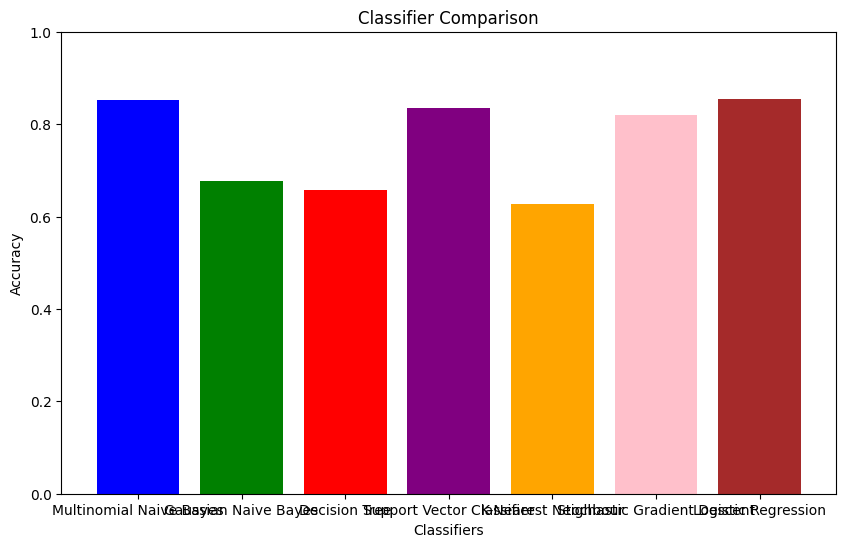

In [ ]:
import matplotlib.pyplot as plt

classifiers = ['Multinomial Naive Bayes', 'Gaussian Naive Bayes', 'Decision Tree', 'Support Vector Classifier', 'K-Nearest Neighbour', 'Stochastic Gradient Descent', 'Logistic Regression']
accuracies = [mnbaccuracy, gnb_accuracy, dtree_accuracy, svcaccuracy, knnaccuracy, sgd_accuracy, lr_accuracy]

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(classifiers, accuracies, color=['blue', 'green', 'red', 'purple', 'orange', 'pink', 'brown'])
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.title('Classifier Comparison')
plt.ylim(0, 1)  # Set the y-axis limits to represent accuracy between 0 and 1
plt.show()